In [12]:
# https://pymoo.org/getting_started/part_3.html
# https://arxiv.org/pdf/2106.04854.pdf
import numpy as np
from pymoo.core.problem import ElementwiseProblem

class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_ieq_constr=0, # constrains auf zero if we dont need them 
                         xl=np.array([-2,-2]),
                         xu=np.array([2,2]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 100 * (x[0]**2 + x[1]**2)
        f2 = (x[0]-1)**2 + x[1]**2

        g1 = 2*(x[0]-0.1) * (x[0]-0.9) / 0.18
        g2 = - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8

        out["F"] = [f1, f2]
        #out["G"] = [g1, g2]


problem = MyProblem()

In [13]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling

algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)

In [14]:
from pymoo.termination import get_termination

termination = get_termination("n_gen", 200)

In [15]:
from pymoo.optimize import minimize

res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

X = res.X
F = res.F

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       40 |      2 |             - |             -
     2 |       50 |      2 |  0.000000E+00 |             f
     3 |       60 |      4 |  0.0591857930 |         ideal
     4 |       70 |      6 |  0.0794514152 |         ideal
     5 |       80 |      6 |  0.000000E+00 |             f
     6 |       90 |      5 |  0.0646824920 |         ideal
     7 |      100 |      5 |  0.000000E+00 |             f
     8 |      110 |      6 |  0.0237515925 |             f
     9 |      120 |      6 |  0.0416778344 |         ideal
    10 |      130 |      8 |  0.0496410823 |             f
    11 |      140 |      8 |  0.0025236601 |             f
    12 |      150 |      8 |  0.0053482778 |             f
    13 |      160 |     10 |  0.0077160734 |             f
    14 |      170 |     11 |  0.0031721977 |         ideal
    15 |      180 |     13 |  0.0193043480 |             f
    16 |      190 |     14 |  0.0228706506 |            

In [8]:
X

array([[ 7.59233271e-01, -1.29829399e-01],
       [ 8.73072614e-01,  5.95564482e-02],
       [ 5.15584044e-01, -1.17748213e-01],
       [ 3.85717378e-01, -9.76753443e-02],
       [ 4.00273380e-01, -9.93273393e-02],
       [ 6.40489520e-01,  4.02057614e-02],
       [ 4.44687547e-02, -8.14763908e-04],
       [ 8.38449720e-01,  5.26396382e-02],
       [ 5.77969867e-01, -1.77364595e-01],
       [ 3.13158339e-01,  1.55303743e-01],
       [ 1.16598849e-01,  1.82093567e-02],
       [ 4.67258854e-01, -1.15798866e-01],
       [ 1.51818520e-01, -1.22106893e-01],
       [ 4.63265638e-01, -1.17877767e-01],
       [ 1.03829270e+00,  5.01586227e-03],
       [ 5.67336396e-02,  1.44718261e-02],
       [ 4.34292303e-01,  4.74865262e-02],
       [ 1.77892607e-01, -2.26458263e-01],
       [ 3.76886340e-01,  3.98020749e-02],
       [ 1.02718327e+00,  5.95564482e-02],
       [ 5.91156883e-02, -2.06912803e-03],
       [ 6.25842586e-01,  4.14601255e-02],
       [ 4.50846105e-02, -8.14763908e-04],
       [ 6.

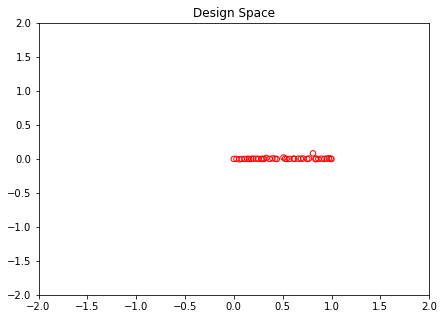

In [16]:
import matplotlib.pyplot as plt
xl, xu = problem.bounds()
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=30, facecolors='none', edgecolors='r')
plt.xlim(xl[0], xu[0])
plt.ylim(xl[1], xu[1])
plt.title("Design Space")
plt.show()

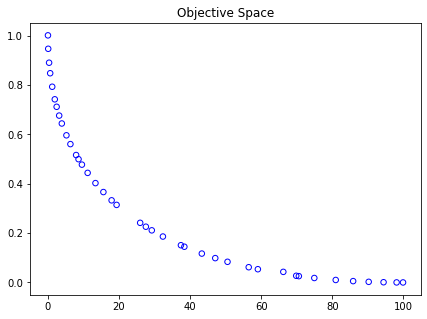

In [17]:
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()